# Introduction to regresssion with neural networks #

**There are many definitions for a regression problem but in our case, we are going to simplify it : predicting a numerical variable based on some other combination of variables, even shorter... predicting a number**

In [1]:
import tensorflow as tf
print(tf.__version__)

2022-07-04 08:53:40.339417: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


2.9.1


# Creating data to view and fit #

array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)

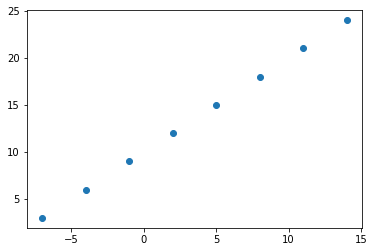

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0,-4.0,-1.0,2.0,5.0,8.0,11.0,14.0],dtype=np.float32)

# Create labels
Y = np.array([3.0,6.0,9.0,12.0,15.0,18.0,21.0,24.0],dtype=np.float32)

# Visualize it
plt.scatter(X,Y)
X

In [3]:
# Relationship between X and Y
Y == X+10

array([ True,  True,  True,  True,  True,  True,  True,  True])

In [4]:
# Create a demo tensor for our housing price prediction problem
houseinfo = tf.constant(["bedroom","bathroom","garage"])
houseprice = tf.constant([939700])
houseinfo, houseprice

2022-07-04 08:53:43.628456: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [5]:
# Turn numpy arrays into tensors
X = tf.reshape(tf.constant(X),shape=(8,))
Y = tf.constant(Y)
X,Y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [6]:
ins = X[0].shape
outs = Y[0].shape
ins,outs

(TensorShape([]), TensorShape([]))

## Steps in modelling with tensorflow

In [7]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    
    #tf.keras.layers.Dense(units=1,input_shape=[1],activation="relu")
    tf.keras.layers.Dense(units=1,input_shape=[1],activation=None),
   
    
    tf.keras.layers.Dense(1)
    
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae is short for mean absolute error
             optimizer=tf.keras.optimizers.Adam(lr=0.153),metrics=["mae"])

RUN_NAME = "run 2 with 5 nodes"
logger = tf.keras.callbacks.TensorBoard(
    log_dir='logs/{}'.format(RUN_NAME),
    histogram_freq=5,
    write_graph=True
)
# 3. Fit the model
model.fit(X,Y,epochs=50,verbose=0,callbacks=[logger])

/home/vihanga/Desktop/TutorialProjects/TF_Fundamentals/py3env/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [8]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
%tensorboard --logdir logs

In [9]:
# Make prediction
model.predict([25.0])

1/1 [==============================] - 0s 62ms/step


array([[35.22254]], dtype=float32)

In [10]:
scores = model.evaluate(X, Y, verbose=1)
print("Accuracy: %.2f%%" % (scores[1]*100))

1/1 [==============================] - 0s 73ms/step - loss: 0.0969 - mae: 0.0969
Accuracy: 9.69%


# Evaluating a model #

In [11]:
# Make a bigger data set
X = tf.range(-100,100,4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [12]:
# Make labels for the dataset
Y = X+10
Y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

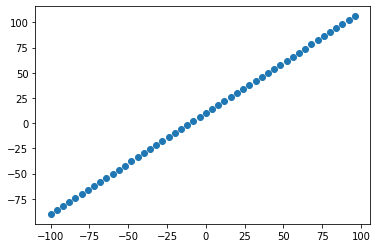

In [13]:
# Visualize data
plt.scatter(X,Y)

In [14]:
# Split the data into train and test sets
X_train = X[:40]
Y_train = Y[:40]

X_test = X[40:]
Y_test = Y[40:]


**Visualizing the data**

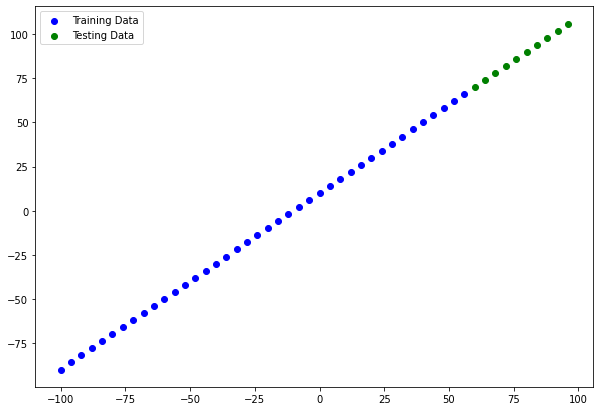

In [15]:
plt.figure(figsize=(10,7))
# Plot training data in blue
plt.scatter(X_train,Y_train, c="b", label="Training Data")
#Plot test data in green
plt.scatter(X_test,Y_test, c="g",label="Testing Data")
# Show  a legend
plt.legend()

In [16]:
# Let's have a look at how to build a neural network for the data
# 1. Create a model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1],name="input_layer"),
    tf.keras.layers.Dense(1,name="output_layer")
],name="my_model")

# 2.compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model.fit(X_train,Y_train,epochs=100,verbose=0)
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable parameters - these are the parameters (patterns) the model can update as it trains
* Non-trainable params-these parameters are not updated during training(This is typical when you bring in already learn patterns or parameters from other models during **transfer learning**)

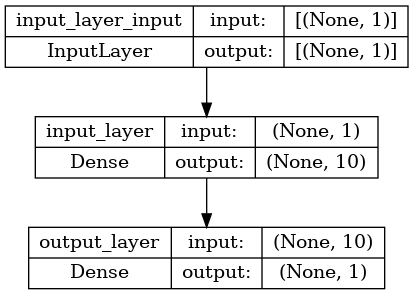

In [17]:
from tensorflow.keras.utils import plot_model
plot_model(model=model, show_shapes=True)

# Visualizing model predictions #

In [18]:
# Make some predictions
Y_pred = model.predict(X_test)
Y_pred

1/1 [==============================] - 0s 38ms/step


array([[ 75.97806 ],
       [ 80.92621 ],
       [ 85.874374],
       [ 90.82253 ],
       [ 95.77069 ],
       [100.71885 ],
       [105.66701 ],
       [110.61517 ],
       [115.56333 ],
       [120.5115  ]], dtype=float32)

In [19]:
# Lets create a plotting function
def plot_predictions(train_data=X_train,
                    train_labels=Y_train,
                    test_data=X_test,
                    test_labels=Y_test,
                    predictions=Y_pred):
    
    plt.figure(figsize=(10,7))
    # plot training data in blue
    plt.scatter(train_data, train_labels, c="b",label="Training data")
    # plot testing data in green
    plt.scatter(test_data,test_labels, c="g",label="Testing data")
    # plot models predictions in red
    plt.scatter(test_data,predictions, c="r",label="Predictions")
    # SHow the legend
    plt.legend()
    

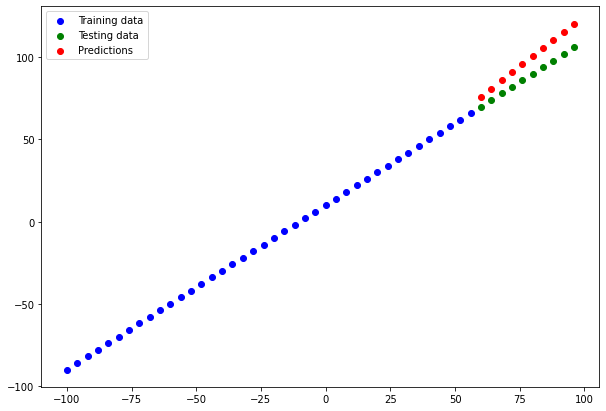

In [20]:
plot_predictions()

# Evaluating model predictions with regression evaluation metrics #
Since we are working on a regression, two of the main metrics:<br>
* MAE - mean absolute error, "on average, how wrong is each of model predictions"
* MSE - mean square error

In [21]:
# Evaluate the model on the test
model.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 68ms/step - loss: 10.2448 - mae: 10.2448


[10.244771957397461, 10.244771957397461]

In [22]:
# Calculate the mean absoute error
mae = tf.metrics.mean_absolute_error(y_true=Y_test,y_pred=tf.squeeze(Y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=10.244772>

In [23]:
# calculate the mean square error
mse = tf.metrics.mean_squared_error(y_true=Y_test,
                                    y_pred=tf.squeeze(Y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=112.37217>

In [24]:
# Make functions to reuse MAE and MSE
def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true,
                                          y_pred=tf.squeeze(y_pred))

# Running expreiments to improve our model #

**Build MODEL_1**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# creating the model
model_1 = tf.keras.Sequential([

    tf.keras.layers.Dense(1,input_shape=[1])
])

# Compile the model
model_1.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])
# Fit the model
model_1.fit(X_train, Y_train, epochs=50,verbose=1)

1/1 [==============================] - 0s 29ms/step


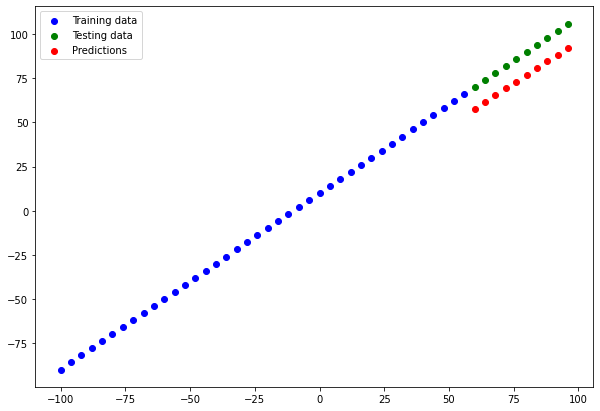

In [26]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [27]:
mae_1 = mae(Y_test,y_preds_1)
mse_1 = mse(Y_test,y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=12.9609375>,
 <tf.Tensor: shape=(), dtype=float32, numpy=168.2675>)

**Build model 2**

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
    tf.keras.layers.Dense(1)

])

# Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.SGD(),
                metrics=['mse'])

# Fit the model
model_2.fit(X_train, Y_train, epochs = 100)

1/1 [==============================] - 0s 11ms/step


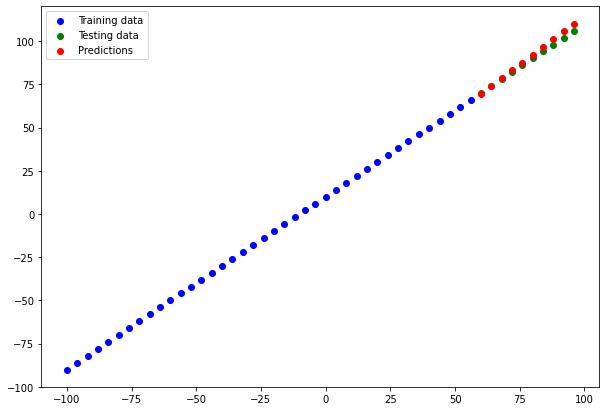

In [36]:
# Make and plot predictions of model_2
Y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=Y_preds_2)

In [38]:
# Calculate model 2 evaluation metrics
mae_2 = mae(Y_test,Y_preds_2)
mse_2 = mse(Y_test,Y_preds_2)
mae_2,mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=1.9097618>,
 <tf.Tensor: shape=(), dtype=float32, numpy=5.458942>)

**Build model_3**

*2 layers trained for 500 epochs*

In [42]:
# Set the random seed
tf.random.set_seed(42)

# Create the model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(1,input_shape=[1]),
    tf.keras.layers.Dense(1)
])

# COmpile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics = ["mae"])

# Fit the model
model_3.fit(X_train,Y_train, epochs = 500, verbose=0)

1/1 [==============================] - 0s 11ms/step


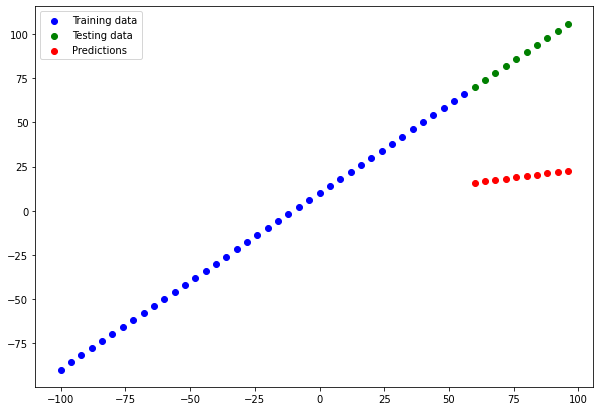

In [45]:
# Make and plot predictions for model_3
Y_pred_3 = model_3.predict(X_test)
plot_predictions(predictions = Y_pred_3)

In [47]:
# calculate model 3 evaluation metrics
mae_3 = mae(Y_test,Y_pred_3)
mse_3 = mae(Y_test,Y_pred_3)
mae_3,mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.68785>,
 <tf.Tensor: shape=(), dtype=float32, numpy=68.68785>)

# Comparing the results of our experiments #

In [52]:
# Lets compare model results using pandas DataFrame
import pandas as pd

model_results = [["model_1",mae_1.numpy(),mse_1.numpy()],
                 ["model_2",mae_2.numpy(),mae_2.numpy()],
                 ["model_3",mae_3.numpy(),mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["Model","mae","mse"])
all_results

,Model,mae,mse
0,model_1,12.960938,168.267502
1,model_2,1.909762,1.909762
2,model_3,68.687851,68.687851


In [53]:
model_2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
 dense_10 (Dense)            (None, 1)                 2         
                                                                 
Total params: 4
Trainable params: 4
Non-trainable params: 0
_________________________________________________________________
